# Wikipedia web network
This notebook creates an adjacency matrix from a root Wikipedia page. It then find the PageRank of the produced web network. 

Created by Tim Chartier

### Create the network

In [1]:
import wikipediaNetwork as wiki

sizeOfNetwork = 25 # How many Wikipedia web pages do you want in the network? 
A, wikiPages = wiki.wikipediaNetwork('https://en.wikipedia.org/wiki/Cristiano_Ronaldo',sizeOfNetwork)

### Plot the network

[[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

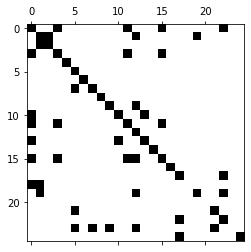

In [2]:
import matplotlib.pylab as plt
message = plt.spy(A)
print(A)

### Compute PageRank on network

In [3]:
# This function finds the PageRank of a networ passed as an adjacency matrix. 
# Created by Tim Chartier. 

def pagerank(A,TOL = 10^-3):

    import numpy as np
    
    # Remove loops (links to one's own webpage)
    A = A - np.diag(np.diag(A))
    
    # Construct Google matrix 
    alpha = 0.85
    rowSum = np.sum(A,1) # Compute the row sums
    sizeOfNetwork = len(A)
    G = np.zeros((sizeOfNetwork,sizeOfNetwork))
    for i in range(sizeOfNetwork):
        if (rowSum[i] == 0): # dangling node
            G[i,:] = np.ones((1,sizeOfNetwork))/sizeOfNetwork
        else:
            G[i,:] = alpha*A[i,:]/rowSum[i] + (1-alpha)/sizeOfNetwork

    # Compute PageRank vector
    numberOfLoops = 100
    v0 = np.ones(sizeOfNetwork)/sizeOfNetwork  # initial state
    vNew = v0
    for i in range(numberOfLoops):
        vOld = vNew
        vNew = vOld@G     
        if (np.amax(vNew - vOld) < TOL):
            break

    return vNew

In [4]:
import numpy as np
pageRankVector = pagerank(A)

### Print the results

In [5]:
numberOfPagesToPrint = 10

numberOfPagesToPrint = np.amin([len(pageRankVector),numberOfPagesToPrint])

iSort = np.argsort(-pageRankVector)   # the - gives us a reverse sort and np.argsort gives us the indices of the sort
print('Rank  PageRank   Webpage')
print('==============================================')
for i in range(numberOfPagesToPrint):
    print(f'{i:3d}   {pageRankVector[iSort[i]]:7.5f}    {wikiPages[iSort[i]]}')

Rank  PageRank   Webpage
  0   0.19172    /wiki/ACF_Fiorentina
  1   0.18429    /wiki/Away_goals_rule
  2   0.07906    /wiki/FIFA_World_Player_of_the_Year
  3   0.06097    /wiki/The_Best_FIFA_Football_Awards_2021
  4   0.05760    /wiki/1991_FIFA_World_Player_of_the_Year
  5   0.05760    /wiki/1993_FIFA_World_Player_of_the_Year
  6   0.05696    /wiki/Sweden_national_football_team
  7   0.04343    /wiki/Sergio_Ramos
  8   0.03641    /wiki/Primeira_Liga
  9   0.02383    /wiki/Giorgio_Chiellini
